### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
# import pandas_datareader as pdr
# key=""

In [3]:
# df = pdr.get_data_tiingo('AAPL', api_key=key)

In [ ]:
# df.to_csv('')
!pip install pandas

In [8]:
import pandas as pd

In [9]:
df=pd.read_csv('BTC_GBP.csv')

In [10]:
df.head()

,Date,Open,High,Low,Close
0,2020-05-08,8027.425781,8066.852051,7887.197266,7933.799316
1,2020-05-09,7932.380859,7991.187988,7722.593262,7733.275391
2,2020-05-10,7731.077148,7734.632812,6766.977051,7052.648438
3,2020-05-11,7051.927246,7335.576172,6790.696777,6976.056641
4,2020-05-12,6983.023438,7289.691895,6949.149902,7185.369629


In [11]:
df.tail()

,Date,Open,High,Low,Close
1091,2023-05-04,22987.330078,23280.875000,22474.208984,23077.941406
1092,2023-05-05,23097.828125,23362.787109,22815.578125,22927.757812
1093,2023-05-06,22930.751953,23464.337891,22930.218750,23367.664062
1094,2023-05-07,23371.205078,23593.744141,22524.703125,22869.396484
1095,2023-05-08,22522.742188,22667.933594,21956.925781,22068.578125


In [12]:
df1=df.reset_index()['Close']

In [13]:
df1

0        7933.799316
1        7733.275391
2        7052.648438
3        6976.056641
4        7185.369629
            ...     
1091    23077.941406
1092    22927.757812
1093    23367.664062
1094    22869.396484
1095    22068.578125
Name: Close, Length: 1096, dtype: float64

In [24]:
df['Date'] = pd.to_datetime(df['Date'])
import matplotlib.pyplot as plt
# Plot the "Close" column against the "Date" column
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'])

# Customize the plot
plt.title('Bitcoin Historical Data')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')

# Display the plot
plt.show()
# In this example, we first read in the Bitcoin historical data from a CSV file using pandas. We then convert the "Date" column to a datetime object so that we can use it as the x-axis in the plot.

# We then use matplotlib to create a line plot with the "Date" column as the x-axis and the "Close" column as the y-axis. We add a title and axis labels to customize the plot, and then display it using plt.show().








ImportError: DLL load failed while importing _imaging: The specified module could not be found.

In [15]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1

0        7933.799316
1        7733.275391
2        7052.648438
3        6976.056641
4        7185.369629
            ...     
1091    23077.941406
1092    22927.757812
1093    23367.664062
1094    22869.396484
1095    22068.578125
Name: Close, Length: 1096, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(len(df1))

1096


In [17]:
print(df1)

[[0.02235764]
 [0.01767659]
 [0.00178797]
 ...
 [0.38264725]
 [0.37101564]
 [0.35232126]]


In [18]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(876, 220)

In [20]:
train_data

array([[0.02235764],
       [0.01767659],
       [0.00178797],
       [0.        ],
       [0.00488622],
       [0.01395103],
       [0.02291141],
       [0.01706089],
       [0.01800241],
       [0.02397129],
       [0.02329545],
       [0.02246751],
       [0.018808  ],
       [0.01060619],
       [0.01334455],
       [0.01385706],
       [0.00553877],
       [0.00756838],
       [0.00438159],
       [0.0118898 ],
       [0.01763358],
       [0.01566351],
       [0.02060504],
       [0.01603681],
       [0.0272625 ],
       [0.01399432],
       [0.01642902],
       [0.01858385],
       [0.015298  ],
       [0.01507952],
       [0.01610765],
       [0.01623583],
       [0.01702484],
       [0.01839899],
       [0.0101891 ],
       [0.01357954],
       [0.01347595],
       [0.01234463],
       [0.01172779],
       [0.01406982],
       [0.01347276],
       [0.01395888],
       [0.01272969],
       [0.01356755],
       [0.01301568],
       [0.0173317 ],
       [0.01665073],
       [0.012

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(775, 100)
(775,)


(None, None)

In [24]:
print(X_test.shape), print(y_test.shape)

(119, 100)
(119,)


(None, None)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [429]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [430]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [306]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [431]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 487ms/step - loss: 0.0206 - val_loss: 0.0505
Epoch 2/100
12/12 [==============================] - 4s 309ms/step - loss: 0.0035 - val_loss: 0.0046
Epoch 3/100
12/12 [==============================] - 4s 300ms/step - loss: 0.0014 - val_loss: 0.0040
Epoch 4/100
12/12 [==============================] - 3s 287ms/step - loss: 8.1361e-04 - val_loss: 0.0073
Epoch 5/100
12/12 [==============================] - 3s 290ms/step - loss: 6.6860e-04 - val_loss: 0.0062
Epoch 6/100
12/12 [==============================] - 3s 255ms/step - loss: 6.4653e-04 - val_loss: 0.0062
Epoch 7/100
12/12 [==============================] - 3s 291ms/step - loss: 6.6186e-04 - val_loss: 0.0062
Epoch 8/100
12/12 [==============================] - 4s 300ms/step - loss: 6.2498e-04 - val_loss: 0.0049
Epoch 9/100
12/12 [==============================] - 4s 297ms/step - loss: 6.2745e-04 - val_loss: 0.0042
Epoch 10/100
12/12 [==============================] - 4s 303ms/step

In [37]:
import tensorflow as tf

In [39]:
tf.__version__

'2.1.0'

In [432]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [433]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [434]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.9909210035748

In [435]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

235.7193088627771

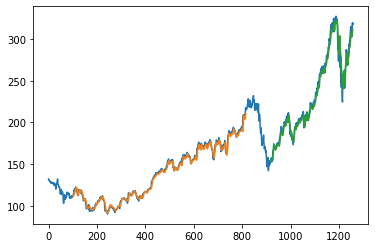

In [436]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [437]:
len(test_data)

441

In [438]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [439]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [440]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [441]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.94413203]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

10 day output [[0.9050924]]
11 day input [0.94950604 0.96424048 0.95512117 0.95989192 0.96635143 0.96246728
 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453 0.92172591
 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625 0.96795575
 1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.9406400

20 day output [[0.90279734]]
21 day input [0.92531453 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895
 0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033
 0.96491598 0.94413203 0.93795931 0.92865342 0.91987926 0.91280973
 0.90777564 0.90473258 0

28 day output [[0.903272]]
29 day input [1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.94413203
 0.93795931 0.92865342 0.91987926 0.91280973 0.90777564 0.90473258
 0.90339231 0.90332204 0.90403908 0.90509242 0.90611798 0.90686554
 0.90720606 0.90711629

In [442]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [443]:
import matplotlib.pyplot as plt

In [391]:
len(df1)

1258

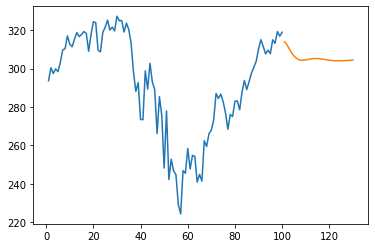

In [444]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

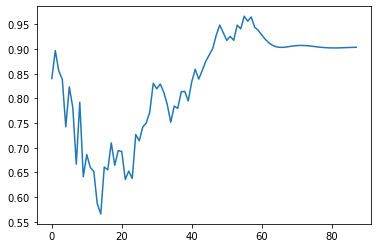

In [446]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [395]:
df3=scaler.inverse_transform(df3).tolist()

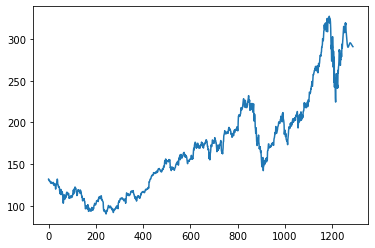

In [396]:
plt.plot(df3)